# Alura Challenge Data Science - Semana 3

## Exterminando o futuro: Criando modelos de ML e compartilhando com os humanos o projeto final

In [69]:
#importando bibliotecas

import pandas as pd
import numpy as np

In [70]:
#Configurações de exibição

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", None)

In [71]:
# Importando base de dados e exibindo seus primeiros registros

data = pd.read_csv('dataset/Telco-Customer-Churn-Tratado.csv')
data.head()

,ClienteId,ClienteCancelado,Gênero,Idoso,Parceiro,Dependentes,TempoContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,SegurançaOnline,BackupOnline,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaSemPapel,FormaPagamento,ContasDiarias,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


## Encoding

#### Antes do encoding, irei alterar a coluna "ClienteCancelado", para notação: 0 = No e 1 = Yes

In [72]:
# Feita a alteração, onde o '0' foi substituido por 'No', e '1' por 'Yes'

for cliente in 'ClienteCancelado':
    data['ClienteCancelado'] = data['ClienteCancelado'].replace({'No': 0, 'Yes': 1})

data.head(10)

,ClienteId,ClienteCancelado,Gênero,Idoso,Parceiro,Dependentes,TempoContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,SegurançaOnline,BackupOnline,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaSemPapel,FormaPagamento,ContasDiarias,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,0,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,0,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,1,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,1,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,1,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
5,0013-MHZWF,0,Female,No,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),2.31,69.40,571.45
6,0013-SMEOE,0,Female,Yes,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),3.66,109.70,7904.25
7,0014-BMAQU,0,Male,No,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),2.82,84.65,5377.80
8,0015-UOCOJ,0,Female,Yes,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1.61,48.20,340.35
9,0016-QLJIS,0,Female,No,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,3.02,90.45,5957.90


In [73]:
# Será utilizado o método 'One-Hot-Enconding' para o encoding, pois com ele não criamos uma hierarquia

categorias = ['Gênero', 'Idoso', 'Parceiro',
              'Dependentes', 'ServiçoTelefone', 'MultiplasLinhas',
              'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
              'ProteçãoDispositivo', 'SuporteTecnico', 'StreamingTV',
              'StreamingFilmes', 'Contrato', 'FaturaSemPapel', 'FormaPagamento']

data = pd.get_dummies(data = data, columns = categorias)
data.head()  

,ClienteId,ClienteCancelado,TempoContrato,ContasDiarias,CobrançaMensal,CobrançaTotal,Gênero_Female,Gênero_Male,Idoso_No,Idoso_Yes,Parceiro_No,Parceiro_Yes,Dependentes_No,Dependentes_Yes,ServiçoTelefone_No,ServiçoTelefone_Yes,MultiplasLinhas_No,MultiplasLinhas_No phone service,MultiplasLinhas_Yes,ServiçoInternet_DSL,ServiçoInternet_Fiber optic,ServiçoInternet_No,SegurançaOnline_No,SegurançaOnline_No internet service,SegurançaOnline_Yes,BackupOnline_No,BackupOnline_No internet service,BackupOnline_Yes,ProteçãoDispositivo_No,ProteçãoDispositivo_No internet service,ProteçãoDispositivo_Yes,SuporteTecnico_No,SuporteTecnico_No internet service,SuporteTecnico_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingFilmes_No,StreamingFilmes_No internet service,StreamingFilmes_Yes,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,FaturaSemPapel_No,FaturaSemPapel_Yes,FormaPagamento_Bank transfer (automatic),FormaPagamento_Credit card (automatic),FormaPagamento_Electronic check,FormaPagamento_Mailed check
0,0002-ORFBO,0,9,2.19,65.6,593.30,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,0003-MKNFE,0,9,2.00,59.9,542.40,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
2,0004-TLHLJ,1,4,2.46,73.9,280.85,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,3.27,98.0,1237.85,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,2.80,83.9,267.40,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


#### Removendo variáveis que não irei utilizar

In [74]:
data = data.drop(['ClienteId'], axis = 1)
data.head()

,ClienteCancelado,TempoContrato,ContasDiarias,CobrançaMensal,CobrançaTotal,Gênero_Female,Gênero_Male,Idoso_No,Idoso_Yes,Parceiro_No,Parceiro_Yes,Dependentes_No,Dependentes_Yes,ServiçoTelefone_No,ServiçoTelefone_Yes,MultiplasLinhas_No,MultiplasLinhas_No phone service,MultiplasLinhas_Yes,ServiçoInternet_DSL,ServiçoInternet_Fiber optic,ServiçoInternet_No,SegurançaOnline_No,SegurançaOnline_No internet service,SegurançaOnline_Yes,BackupOnline_No,BackupOnline_No internet service,BackupOnline_Yes,ProteçãoDispositivo_No,ProteçãoDispositivo_No internet service,ProteçãoDispositivo_Yes,SuporteTecnico_No,SuporteTecnico_No internet service,SuporteTecnico_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingFilmes_No,StreamingFilmes_No internet service,StreamingFilmes_Yes,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,FaturaSemPapel_No,FaturaSemPapel_Yes,FormaPagamento_Bank transfer (automatic),FormaPagamento_Credit card (automatic),FormaPagamento_Electronic check,FormaPagamento_Mailed check
0,0,9,2.19,65.6,593.30,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,0,9,2.00,59.9,542.40,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
2,1,4,2.46,73.9,280.85,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,13,3.27,98.0,1237.85,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,1,3,2.80,83.9,267.40,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


## Verificar se a variável target está balanceada

In [75]:
data.ClienteCancelado.value_counts()

0    5174
1    1869
Name: ClienteCancelado, dtype: int64

In [76]:
print(f'Existem {data.ClienteCancelado.value_counts()[0]} clientes que tem contrato com a empresa e ' +
      f'{data.ClienteCancelado.value_counts()[1]} clientes que não possuem. O dataset não está balanceado.')

Existem 5174 clientes que tem contrato com a empresa e 1869 clientes que não possuem. O dataset não está balanceado.


Irei utilizar a técnica de balanceamento de dados **oversampling**, que é basicamente duplicar, fazer a cópia dos nossos dados da classe minoritária até chegar no valor da classe majoritária. Então, ela faria cópia dos dados de 'churn', ou seja, criaria novos dados até chegarmos ao número de dados dos clientes com contrato. Para que não ocorra muitos dados idênticos, será utilizada a técnica SMOTE, que cria dados sintéticos próximos dos reais.

In [77]:
from imblearn.over_sampling import SMOTE

SEED = 25
smote = SMOTE(random_state = SEED)

In [78]:
x = data.drop('ClienteCancelado', axis = 1)
y = data['ClienteCancelado']

In [79]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [80]:
data_balanced = pd.concat([y_resampled, x_resampled], axis = 1)
data_balanced

,ClienteCancelado,TempoContrato,ContasDiarias,CobrançaMensal,CobrançaTotal,Gênero_Female,Gênero_Male,Idoso_No,Idoso_Yes,Parceiro_No,Parceiro_Yes,Dependentes_No,Dependentes_Yes,ServiçoTelefone_No,ServiçoTelefone_Yes,MultiplasLinhas_No,MultiplasLinhas_No phone service,MultiplasLinhas_Yes,ServiçoInternet_DSL,ServiçoInternet_Fiber optic,ServiçoInternet_No,SegurançaOnline_No,SegurançaOnline_No internet service,SegurançaOnline_Yes,BackupOnline_No,BackupOnline_No internet service,BackupOnline_Yes,ProteçãoDispositivo_No,ProteçãoDispositivo_No internet service,ProteçãoDispositivo_Yes,SuporteTecnico_No,SuporteTecnico_No internet service,SuporteTecnico_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingFilmes_No,StreamingFilmes_No internet service,StreamingFilmes_Yes,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,FaturaSemPapel_No,FaturaSemPapel_Yes,FormaPagamento_Bank transfer (automatic),FormaPagamento_Credit card (automatic),FormaPagamento_Electronic check,FormaPagamento_Mailed check
0,0,9,2.190000,65.600000,593.300000,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,0,9,2.000000,59.900000,542.400000,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
2,1,4,2.460000,73.900000,280.850000,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,13,3.270000,98.000000,1237.850000,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,1,3,2.800000,83.900000,267.400000,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,21,1.039973,31.277442,673.524300,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10344,1,38,3.224635,96.689054,3752.442684,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
10345,1,9,3.068459,92.049687,860.055985,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
10346,1,5,2.596265,77.815525,414.502376,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [81]:
data_balanced.ClienteCancelado.value_counts()

0    5174
1    5174
Name: ClienteCancelado, dtype: int64

In [82]:
print(f'Existem {data_balanced.ClienteCancelado.value_counts()[0]} clientes que tem contrato com a empresa e ' +
      f'{data_balanced.ClienteCancelado.value_counts()[1]} clientes que não possuem. Deste modo o dataset se encontra balanceado')

Existem 5174 clientes que tem contrato com a empresa e 5174 clientes que não possuem. Deste modo o dataset se encontra balanceado


## Criar dois modelos de machine Learning

In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

#Função para separação dos dados do dataset, em dados de treino e dados de teste
def treino_teste(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED)
    return x_train, x_test, y_train, y_test    

#Função para treinamento e previsão do modelo
def classificador(classificador, x_train, x_test, y_train):
    modelo = classificador.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    return y_pred

#Função para realizar metricas do modelo
def metricas(y_pred, y_test):
    print("Acurácia:", round(metrics.accuracy_score(y_test, y_pred), 2))
    print("Precisão:", round(metrics.precision_score(y_test, y_pred), 2))
    print("Recall:", round(metrics.recall_score(y_test, y_pred), 2)) 
    print("F1:", round(metrics.f1_score(y_test, y_pred), 2))
    #print("Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    
#Curva Roc
def curva(classificador, x_test, y_test):
    y_pred_proba = classificador.predict_proba(x_test)[::, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.rcParams['figure.figsize'] = (12., 8.)
    plt.plot(fpr, tpr, label = 'LR, auc = ' + str(auc))
    plt.plot([0,1], [0,1], color = 'red', lw = 2, linestyle = '--')
    plt.legend(loc = 4)

#Comparação de Metricas
def comp_metricas(classificadores, x, y):
    x_train, x_test, y_train, y_test = treino_teste(x, y)
    for classifier in classificadores:
        cf = classifier
        y_pred = classificador(cf, x_train, x_test, y_train)
        name = classifier.__class__.__name__
        print("="*30)
        print(name)
        print('')
        print('****Resultados****')
        metricas(y_pred, y_test)
        print('')

### Regressão Logística

In [84]:
#Dados x e y

x = data_balanced.drop('ClienteCancelado', axis = 1)
y = data_balanced['ClienteCancelado']

In [85]:
#Separação de dados teste e treino
x_train, x_test, y_train, y_test = treino_teste(x, y)

In [86]:
#treino e previsão

rl = LogisticRegression(max_iter = 1000, random_state = SEED)
y_pred_rl = classificador(rl, x_train, x_test, y_train)

Acurácia: 0.86
Precisão: 0.88
Recall: 0.84
F1: 0.86


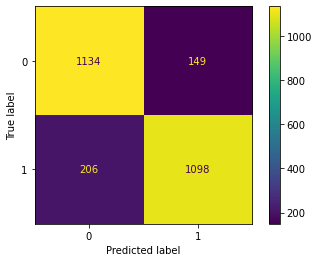

In [87]:
#Metricas
metricas(y_pred_rl, y_test)

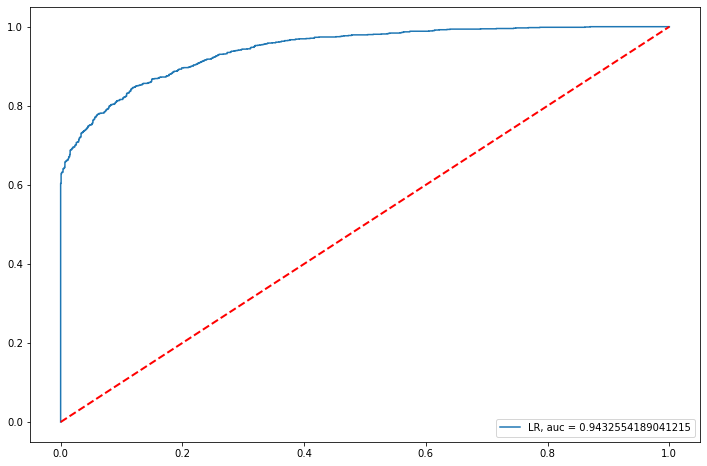

In [88]:
curva(rl, x_test, y_test)

### 

### Random Forest

Acurácia: 0.83
Precisão: 0.8
Recall: 0.89
F1: 0.84


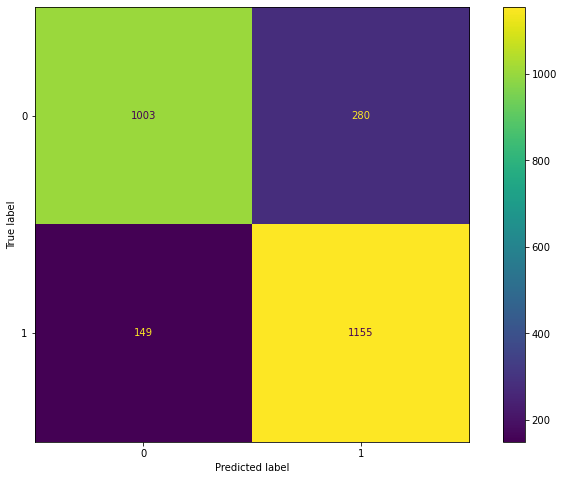

In [89]:
rf = RandomForestClassifier(max_depth = 5, random_state = SEED)
y_pred_rf = classificador(rf, x_train, x_test, y_train)
metricas(y_pred_rf, y_test)

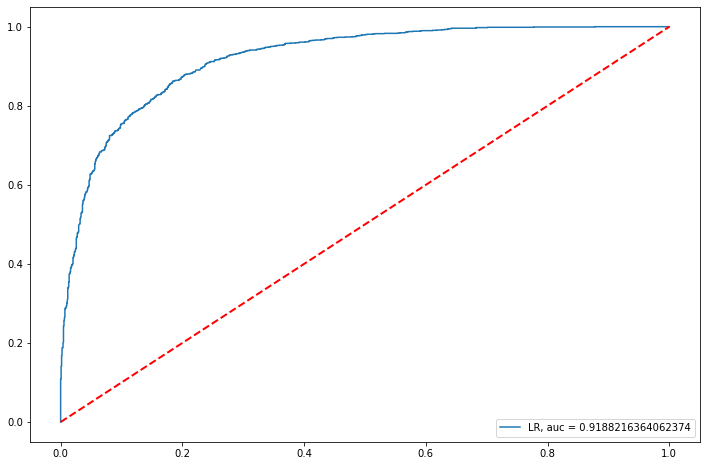

In [90]:
curva(rf, x_test, y_test)

### Árvore de Decisão

Acurácia: 0.82
Precisão: 0.78
Recall: 0.88
F1: 0.83


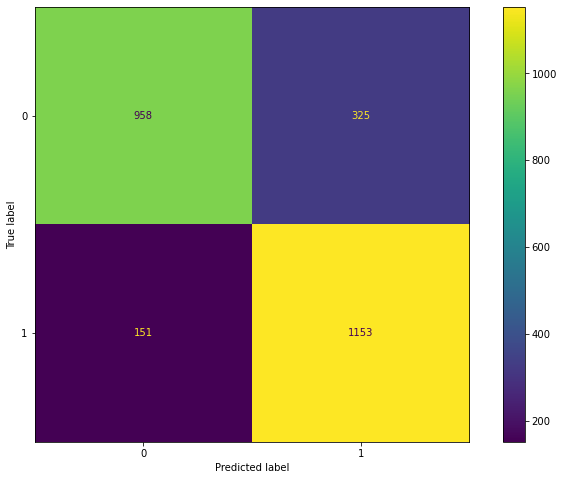

In [91]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = SEED)
y_pred_dt = classificador(dt, x_train, x_test, y_train)
metricas(y_pred_dt, y_test)

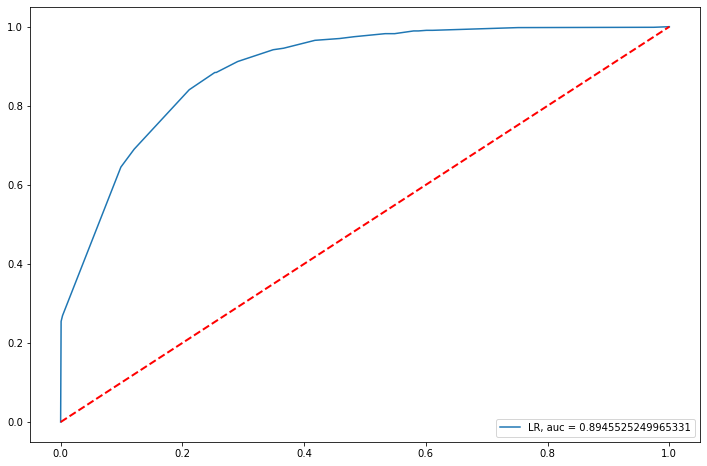

In [92]:
curva(dt, x_test, y_test)

#### Comparação das métricas dos modelos

In [93]:
classificadores = [
    LogisticRegression(max_iter = 1000, random_state = SEED),
    RandomForestClassifier(max_depth = 5, random_state = SEED),
    DecisionTreeClassifier(max_depth = 5, random_state = SEED)
]

LogisticRegression

****Resultados****
Acurácia: 0.86
Precisão: 0.88
Recall: 0.84
F1: 0.86

RandomForestClassifier

****Resultados****
Acurácia: 0.83
Precisão: 0.8
Recall: 0.89
F1: 0.84

DecisionTreeClassifier

****Resultados****
Acurácia: 0.82
Precisão: 0.78
Recall: 0.88
F1: 0.83



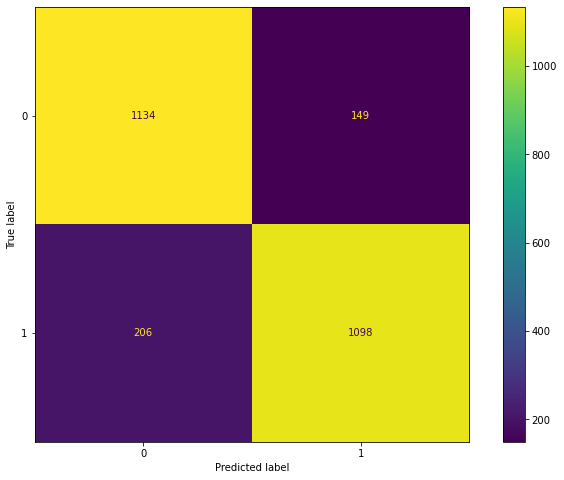

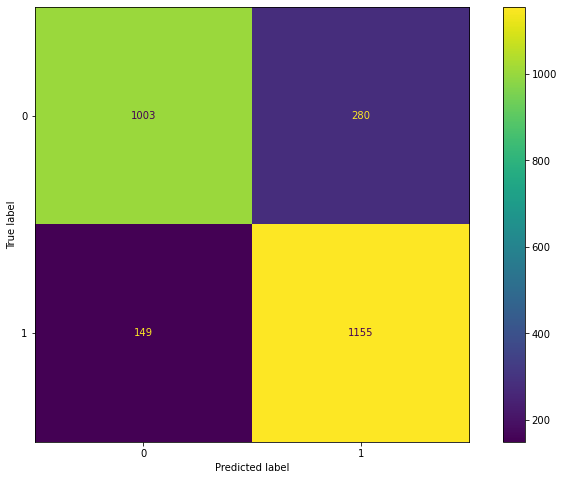

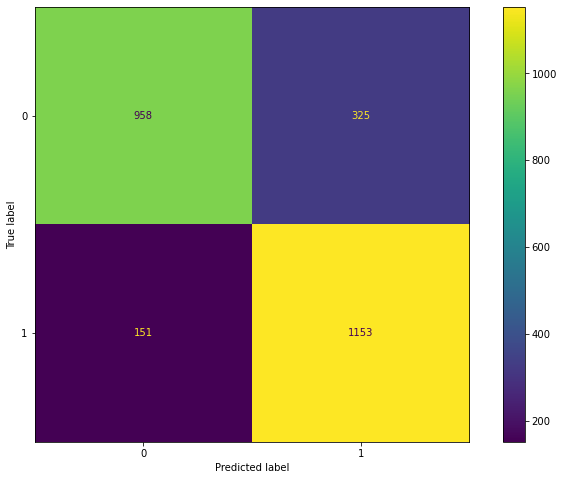

In [94]:
comp_metricas(classificadores, x, y)

### Melhorar Modelo

Como foi visto anteriormente, o recall do modelo que utiliza a Randon Forest obteve o a melhor metrica de recall. Essa que mede a proporção entre os Verdadeiros positivos, ou seja, a quantidade de resultados positivos o modelo acertou. Para melhorar o modelo será utilizada o método RandomizedSearchCV.

In [119]:
n_estimators = np.arange(20, 1000, step = 20)
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']
max_depth = list(np.arange(2, 1000, step = 1))
min_samples_split = np.arange(2, 1000, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [120]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

rforest = RandomForestClassifier(random_state = SEED)

In [122]:
random_cv = RandomizedSearchCV(rforest, param_grid, n_iter = 5, cv = 3, scoring = 'recall', n_jobs = -1, random_state = SEED)

In [123]:
%%time
rcv = random_cv.fit(x, y)

Wall time: 29.5 s


In [124]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.994176,0.512370,0.906639,0.058769,760,536,2,log2,524,entropy,False,"{'n_estimators': 760, 'min_samples_split': 536, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 524, 'criterion': 'entropy', 'bootstrap': False}",0.494493,0.916473,0.926377,0.779114,0.201298,2
1,0.274983,0.021436,0.033636,0.005436,20,446,2,log2,414,gini,False,"{'n_estimators': 20, 'min_samples_split': 446, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 414, 'criterion': 'gini', 'bootstrap': False}",0.502029,0.909513,0.895072,0.768871,0.188778,4
2,7.701440,0.135677,0.675541,0.007182,720,736,2,sqrt,846,gini,True,"{'n_estimators': 720, 'min_samples_split': 736, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 846, 'criterion': 'gini', 'bootstrap': True}",0.520000,0.892111,0.884058,0.765390,0.173548,5
3,7.102881,1.006262,0.464242,0.116409,380,80,2,sqrt,899,gini,False,"{'n_estimators': 380, 'min_samples_split': 80, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 899, 'criterion': 'gini', 'bootstrap': False}",0.400000,0.958817,0.982609,0.780475,0.269212,1
4,1.601818,0.228693,0.111230,0.013465,120,732,2,sqrt,444,entropy,False,"{'n_estimators': 120, 'min_samples_split': 732, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 444, 'criterion': 'entropy', 'bootstrap': False}",0.496812,0.909513,0.910145,0.772156,0.194698,3


In [125]:
rcv.best_params_

{'n_estimators': 380,
 'min_samples_split': 80,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 899,
 'criterion': 'gini',
 'bootstrap': False}

In [126]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

Acurácia: 0.86
Precisão: 0.86
Recall: 0.86
F1: 0.86


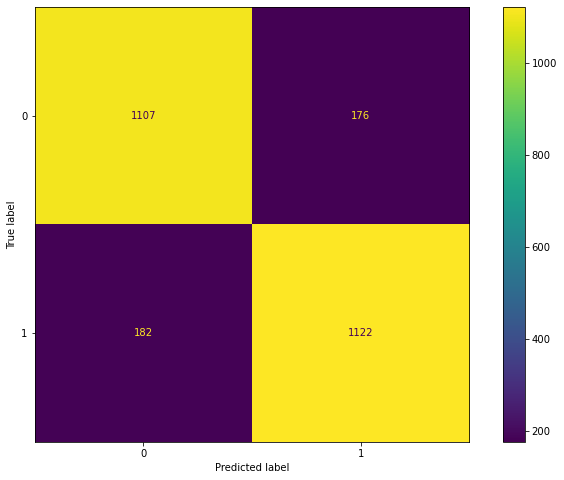

In [127]:
metricas(y_pred, y_test)

Preciso revisar algumas informações....antes de continuar